In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [36]:
# Load the Iris dataset

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Preprocess the data (scaling)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
data = pd.DataFrame(scaled_data)


C:\Users\Muneeza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


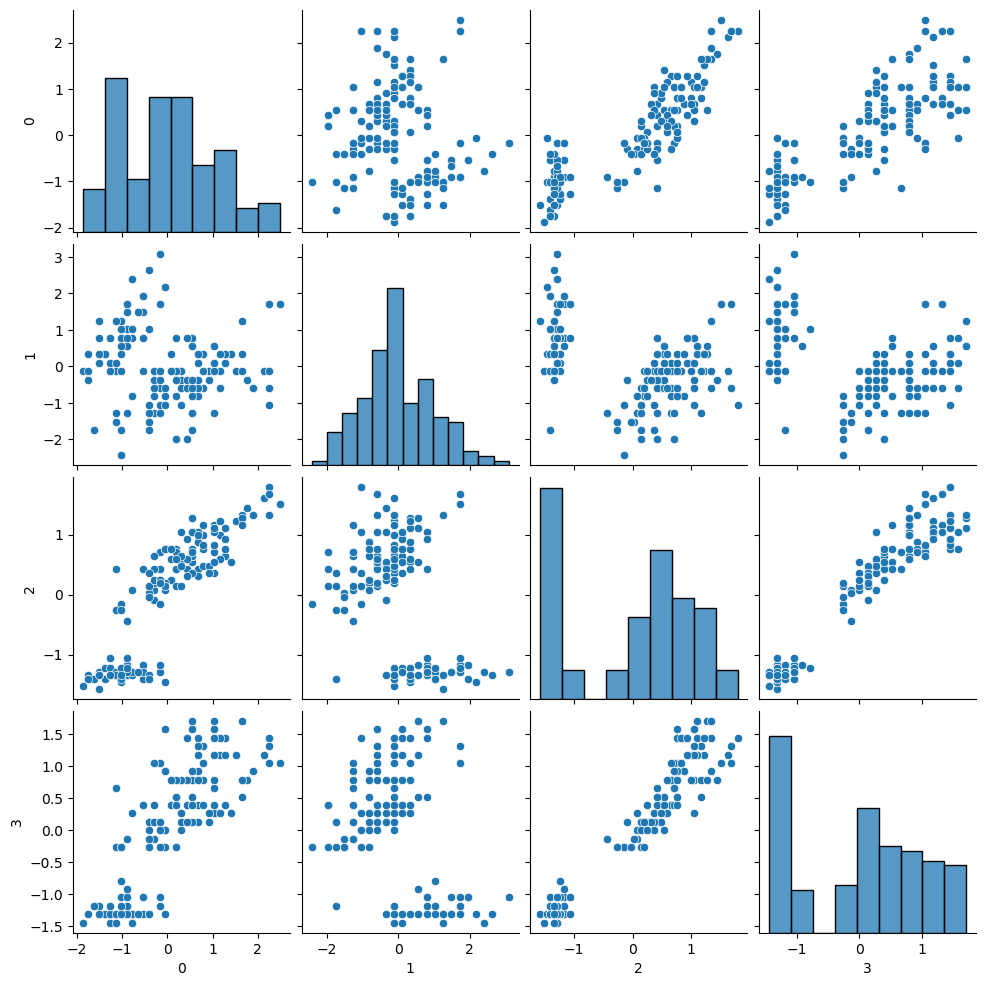

In [38]:
sns.pairplot(data = data)
plt.show()

In [39]:
# Elbow method to determine the optimal number of clusters

inertia = []
K = range(1, 11)


for k in K:
    kmeans = KMeans(n_clusters = k  , init = "k-means++")
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

C:\Users\Muneeza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muneeza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Muneeza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Muneeza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

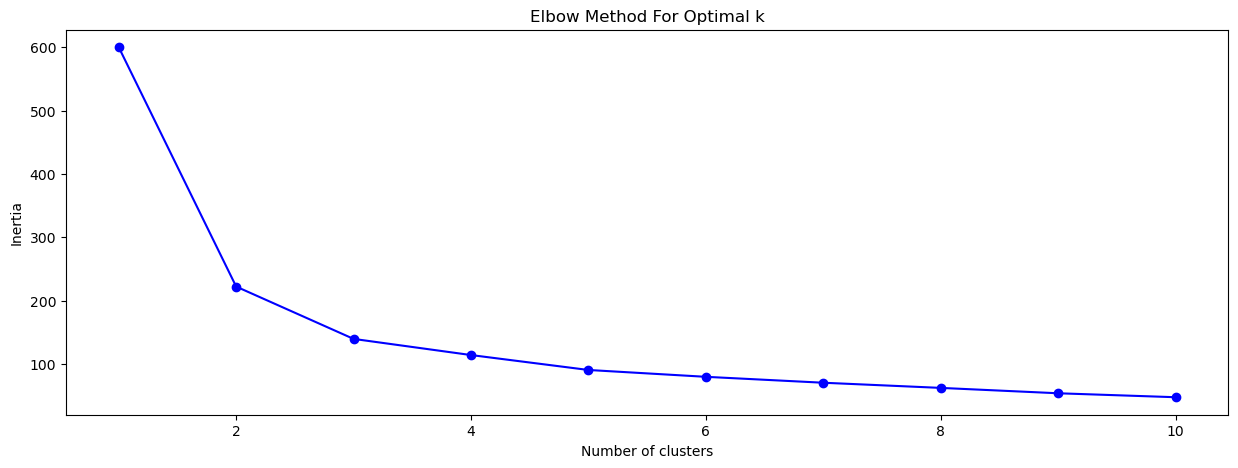

In [40]:
plt.figure(figsize=(15,5))

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
# Apply K-means with the chosen number of clusters

k = 3  
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data)

C:\Users\Muneeza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [42]:
df['Cluster'] = kmeans.labels_

C:\Users\Muneeza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


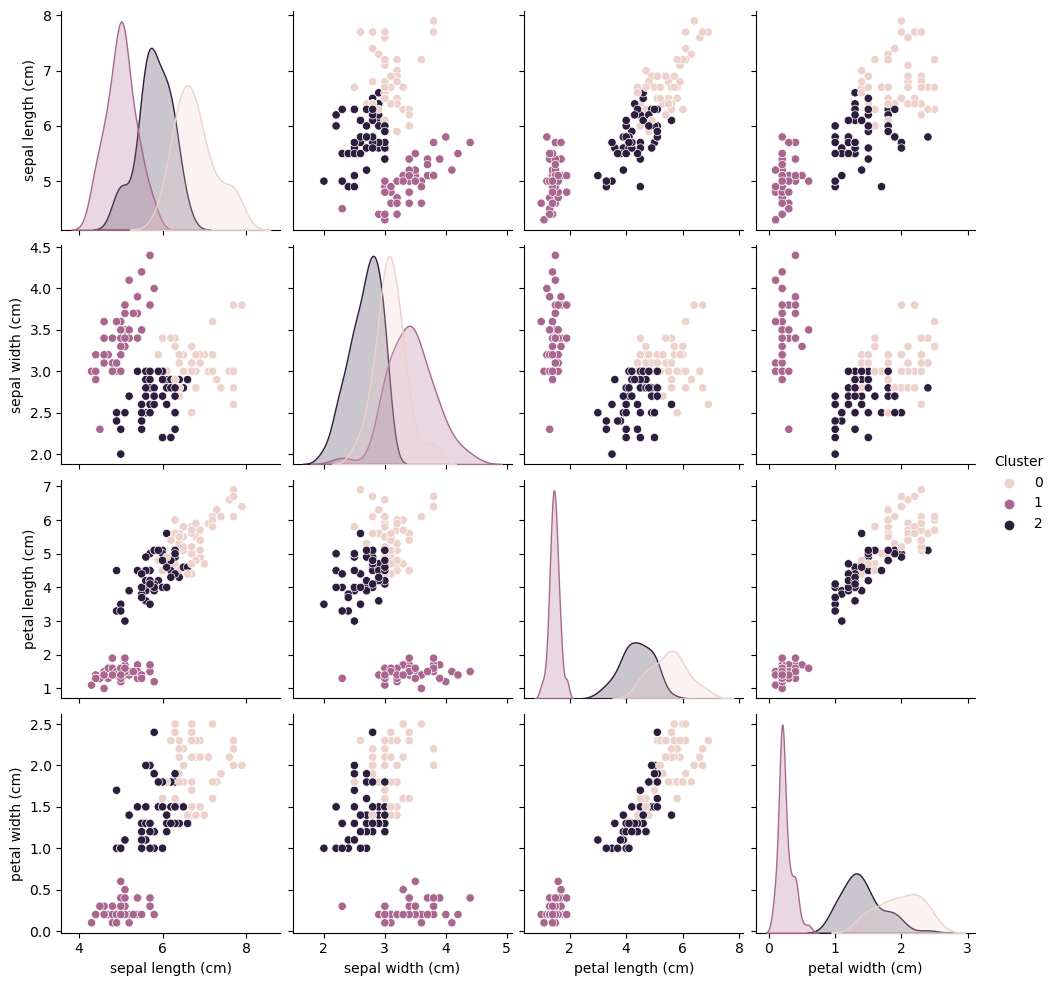

In [46]:
sns.pairplot(data = df, hue="Cluster")
plt.show()